<a href="https://colab.research.google.com/github/saecula/notebooks/blob/main/so_survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

df = pd.read_csv('/content/drive/MyDrive/data/so/2023/survey_results_public.csv')
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [3]:
print(df.columns)

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

In [7]:
schema = pd.read_csv('/content/drive/MyDrive/data/so/2023/survey_results_schema.csv')
schema.head(15)

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID310,Q310,"<div><span style=""font-size:19px;""><strong>You...",False,DB,TB
3,QID312,Q120,,True,MC,SAVR
4,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
5,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
6,QID127,Age,What is your age? *,True,MC,MAVR
7,QID296,Employment,Which of the following best describes your cur...,False,MC,MAVR
8,QID308,RemoteWork,Which best describes your current work situation?,False,MC,SAVR
9,QID297,CodingActivities,Which of the following best describes the code...,False,MC,MAVR


In [30]:
def get_all_descriptions(column_name, schema=schema):
    return schema.loc[schema.qname == column_name]

def get_descriptions(df, schema=schema):
    '''
    INPUT - df - pandas dataframe with the developers survey
            schema - pandas dataframe with the schema of the developers survey
    OUTPUT -
            df_desc - dataframe of the descriptions of the columns
    '''

    cols = []
    descs = []
    for col in df.columns:
        desc = get_all_descriptions(col, schema)
        if desc.shape[0] == 1:
            cols.append(col)
            descs.append(desc.question.values[0])

    df_desc = pd.DataFrame({'col_name': cols, 'description': descs})
    return df_desc

df_descs = get_descriptions(df)
df_descs.head(100)

,col_name,description
0,Q120,
1,MainBranch,Which of the following options best describes ...
2,Age,What is your age? *
3,Employment,Which of the following best describes your cur...
4,RemoteWork,Which best describes your current work situation?
5,CodingActivities,Which of the following best describes the code...
6,EdLevel,Which of the following best describes the high...
7,LearnCode,How do you learn to code? Select all that apply.
8,LearnCodeOnline,What online resources do you use to learn to c...
9,LearnCodeCoursesCert,What online courses or certifications do you u...


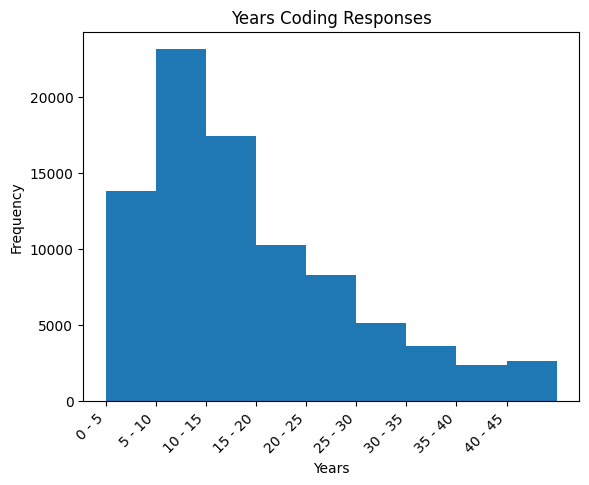

In [78]:
df_yearscode = df.YearsCode.dropna()
df_yearscode = df_yearscode.replace('Less than 1 year', 0)
df_yearscode = df_yearscode.replace('More than 50 years', 50)
df_yearscode = df_yearscode.astype(int)
df_yearscode.describe()

# plot YearsCode
bin_edges = plt.hist(df_yearscode, bins=range(0, df_yearscode.max(), 5))[1]
bin_labels = [f"{int(round(bin_edges[i], 2))} - {int(round(bin_edges[i+1], 2))}" for i in range(len(bin_edges) - 1)]
plt.xticks(bin_edges[:-1], bin_labels, rotation=45, ha='right')  # Set labels and rotate for readability
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.title('Years Coding Responses')
plt.show()